In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np

### Load and scale the data

In [2]:
feature = pd.read_csv('https://github.com/asarmadi/tandon_summer2021_ml/raw/main/day05/fish_market_feature.csv')
label = pd.read_csv('https://github.com/asarmadi/tandon_summer2021_ml/raw/main/day05/fish_market_label.csv')
X = feature.values
y = label.values

In [3]:
# normalize the data using sklearn's StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Xs = scaler.fit_transform(X)

In [4]:
## TODO
# split the SCALED!! data in validation and train

X_train, X_val, y_train, y_val = train_test_split(Xs, y, test_size=0.1, random_state=3)

In [5]:
## TODO
# print the number of data samples in the training and validation data
print(f"The number of data samples in the training data is: {X_train.shape[0]}")
print(f"The number of data samples in the validation data is: {X_val.shape[0]}")

print(f"The number of features is: {X_train.shape[1]}")

The number of data samples in the training data is: 111
The number of data samples in the validation data is: 13
The number of features is: 5


### Build Model

1) Define a model of three dense layers with ReLu activation functions. The output of the two first layers should have 32 neurons. 

2) Train the model for 2000 epochs with a batch size of 64 and a mean squared error loss.


In [6]:
## TODO
n_epochs = 2000
batch_size = 64

model = Sequential([
    Dense(32, activation='relu', input_shape=(5,)),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

model.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['mse', 'mae']
) # use the Adam optimizer

# print a summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                192       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 2,337
Trainable params: 2,337
Non-trainable params: 0
_________________________________________________________________


In [7]:
## TODO
# train the model (use the train data and validation data from above)
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=n_epochs, batch_size=batch_size)

Train on 111 samples, validate on 13 samples
Epoch 1/2000
111/111 [==============================] - 0s 4ms/sample - loss: 273704.0481 - mse: 273704.0625 - mae: 398.2421 - val_loss: 175971.3438 - val_mse: 175971.3438 - val_mae: 316.9977
Epoch 2/2000
111/111 [==============================] - 0s 141us/sample - loss: 273620.3238 - mse: 273620.3125 - mae: 398.1604 - val_loss: 175907.8438 - val_mse: 175907.8438 - val_mae: 316.9207
Epoch 3/2000
111/111 [==============================] - 0s 140us/sample - loss: 273530.5346 - mse: 273530.5312 - mae: 398.0752 - val_loss: 175840.8125 - val_mse: 175840.8125 - val_mae: 316.8411
Epoch 4/2000
111/111 [==============================] - 0s 141us/sample - loss: 273438.5027 - mse: 273438.5000 - mae: 397.9864 - val_loss: 175770.6094 - val_mse: 175770.6094 - val_mae: 316.7597
Epoch 5/2000
111/111 [==============================] - 0s 0s/sample - loss: 273339.6609 - mse: 273339.6562 - mae: 397.8982 - val_loss: 175699.8906 - val_mse: 175699.8906 - val_mae:

Epoch 43/2000
111/111 [==============================] - 0s 141us/sample - loss: 248321.1512 - mse: 248321.1562 - mae: 378.3317 - val_loss: 156984.0625 - val_mse: 156984.0625 - val_mae: 296.5309
Epoch 44/2000
111/111 [==============================] - 0s 0s/sample - loss: 245939.5077 - mse: 245939.5000 - mae: 376.6781 - val_loss: 155306.2188 - val_mse: 155306.2188 - val_mae: 294.7433
Epoch 45/2000
111/111 [==============================] - 0s 199us/sample - loss: 243495.9260 - mse: 243495.9219 - mae: 374.8630 - val_loss: 153512.3281 - val_mse: 153512.3281 - val_mae: 292.8260
Epoch 46/2000
111/111 [==============================] - 0s 0s/sample - loss: 240804.5286 - mse: 240804.5469 - mae: 372.9957 - val_loss: 151602.4219 - val_mse: 151602.4219 - val_mae: 290.7769
Epoch 47/2000
111/111 [==============================] - 0s 141us/sample - loss: 237907.6427 - mse: 237907.6406 - mae: 370.9410 - val_loss: 149568.4688 - val_mse: 149568.4688 - val_mae: 288.5901
Epoch 48/2000
111/111 [========

111/111 [==============================] - 0s 0s/sample - loss: 24438.5690 - mse: 24438.5684 - mae: 134.8518 - val_loss: 12492.3477 - val_mse: 12492.3477 - val_mae: 89.4978
Epoch 86/2000
111/111 [==============================] - 0s 141us/sample - loss: 21550.8437 - mse: 21550.8418 - mae: 127.0885 - val_loss: 11273.3916 - val_mse: 11273.3916 - val_mae: 85.2844
Epoch 87/2000
111/111 [==============================] - 0s 141us/sample - loss: 18891.6917 - mse: 18891.6914 - mae: 120.3810 - val_loss: 10355.4014 - val_mse: 10355.4014 - val_mae: 81.1985
Epoch 88/2000
111/111 [==============================] - 0s 0s/sample - loss: 16932.7735 - mse: 16932.7734 - mae: 114.4361 - val_loss: 9703.9766 - val_mse: 9703.9766 - val_mae: 77.2510
Epoch 89/2000
111/111 [==============================] - 0s 59us/sample - loss: 15133.6981 - mse: 15133.6982 - mae: 108.5656 - val_loss: 9297.0596 - val_mse: 9297.0596 - val_mae: 73.5171
Epoch 90/2000
111/111 [==============================] - 0s 0s/sample - los

Epoch 129/2000
111/111 [==============================] - 0s 0s/sample - loss: 9472.5586 - mse: 9472.5586 - mae: 82.5047 - val_loss: 7796.0620 - val_mse: 7796.0620 - val_mae: 68.8741
Epoch 130/2000
111/111 [==============================] - 0s 141us/sample - loss: 9420.0116 - mse: 9420.0117 - mae: 82.2467 - val_loss: 7751.3052 - val_mse: 7751.3052 - val_mae: 68.6269
Epoch 131/2000
111/111 [==============================] - 0s 141us/sample - loss: 9373.8033 - mse: 9373.8027 - mae: 82.0204 - val_loss: 7704.4873 - val_mse: 7704.4873 - val_mae: 68.3708
Epoch 132/2000
111/111 [==============================] - 0s 141us/sample - loss: 9319.9876 - mse: 9319.9873 - mae: 81.7562 - val_loss: 7655.1201 - val_mse: 7655.1201 - val_mae: 68.1059
Epoch 133/2000
111/111 [==============================] - 0s 0s/sample - loss: 9284.3144 - mse: 9284.3145 - mae: 81.5831 - val_loss: 7603.1025 - val_mse: 7603.1025 - val_mae: 67.8273
Epoch 134/2000
111/111 [==============================] - 0s 199us/sample - 

Epoch 173/2000
111/111 [==============================] - 0s 0s/sample - loss: 7506.4665 - mse: 7506.4663 - mae: 72.1073 - val_loss: 5695.1279 - val_mse: 5695.1279 - val_mae: 57.0424
Epoch 174/2000
111/111 [==============================] - 0s 141us/sample - loss: 7457.7446 - mse: 7457.7441 - mae: 71.8229 - val_loss: 5653.3462 - val_mse: 5653.3462 - val_mae: 56.7643
Epoch 175/2000
111/111 [==============================] - 0s 141us/sample - loss: 7420.1110 - mse: 7420.1108 - mae: 71.5853 - val_loss: 5610.4355 - val_mse: 5610.4355 - val_mae: 56.4829
Epoch 176/2000
111/111 [==============================] - 0s 0s/sample - loss: 7378.0848 - mse: 7378.0845 - mae: 71.3285 - val_loss: 5559.0059 - val_mse: 5559.0059 - val_mae: 56.1686
Epoch 177/2000
111/111 [==============================] - 0s 0s/sample - loss: 7338.0651 - mse: 7338.0654 - mae: 71.0752 - val_loss: 5512.2656 - val_mse: 5512.2656 - val_mae: 55.8541
Epoch 178/2000
111/111 [==============================] - 0s 141us/sample - los

Epoch 217/2000
111/111 [==============================] - 0s 141us/sample - loss: 5948.2356 - mse: 5948.2354 - mae: 61.9653 - val_loss: 4056.7861 - val_mse: 4056.7861 - val_mae: 47.0643
Epoch 218/2000
111/111 [==============================] - 0s 141us/sample - loss: 5921.2739 - mse: 5921.2734 - mae: 61.7496 - val_loss: 4023.8557 - val_mse: 4023.8557 - val_mae: 46.8956
Epoch 219/2000
111/111 [==============================] - 0s 141us/sample - loss: 5894.2469 - mse: 5894.2466 - mae: 61.5357 - val_loss: 4000.4136 - val_mse: 4000.4136 - val_mae: 46.7508
Epoch 220/2000
111/111 [==============================] - 0s 141us/sample - loss: 5866.4930 - mse: 5866.4932 - mae: 61.3252 - val_loss: 3986.4258 - val_mse: 3986.4258 - val_mae: 46.6445
Epoch 221/2000
111/111 [==============================] - 0s 0s/sample - loss: 5836.2538 - mse: 5836.2539 - mae: 61.1129 - val_loss: 3976.9087 - val_mse: 3976.9087 - val_mae: 46.5537
Epoch 222/2000
111/111 [==============================] - 0s 200us/sample

111/111 [==============================] - 0s 141us/sample - loss: 5130.2413 - mse: 5130.2417 - mae: 55.3089 - val_loss: 3327.4236 - val_mse: 3327.4236 - val_mae: 42.9977
Epoch 261/2000
111/111 [==============================] - 0s 141us/sample - loss: 5120.6426 - mse: 5120.6431 - mae: 55.2003 - val_loss: 3310.3130 - val_mse: 3310.3130 - val_mae: 42.8905
Epoch 262/2000
111/111 [==============================] - 0s 141us/sample - loss: 5106.3597 - mse: 5106.3599 - mae: 55.0699 - val_loss: 3304.6912 - val_mse: 3304.6912 - val_mae: 42.8283
Epoch 263/2000
111/111 [==============================] - 0s 0s/sample - loss: 5095.4894 - mse: 5095.4893 - mae: 55.0085 - val_loss: 3313.9067 - val_mse: 3313.9067 - val_mae: 42.8133
Epoch 264/2000
111/111 [==============================] - 0s 141us/sample - loss: 5076.1885 - mse: 5076.1885 - mae: 54.8832 - val_loss: 3308.3276 - val_mse: 3308.3276 - val_mae: 42.7621
Epoch 265/2000
111/111 [==============================] - 0s 199us/sample - loss: 5064.1

111/111 [==============================] - 0s 141us/sample - loss: 4644.5317 - mse: 4644.5317 - mae: 51.0765 - val_loss: 3025.5349 - val_mse: 3025.5349 - val_mae: 40.5666
Epoch 305/2000
111/111 [==============================] - 0s 141us/sample - loss: 4633.6505 - mse: 4633.6504 - mae: 51.0070 - val_loss: 3021.9814 - val_mse: 3021.9814 - val_mae: 40.5176
Epoch 306/2000
111/111 [==============================] - 0s 0s/sample - loss: 4624.1204 - mse: 4624.1206 - mae: 50.9159 - val_loss: 3011.5361 - val_mse: 3011.5361 - val_mae: 40.4609
Epoch 307/2000
111/111 [==============================] - 0s 141us/sample - loss: 4619.3780 - mse: 4619.3779 - mae: 50.8223 - val_loss: 2996.6833 - val_mse: 2996.6833 - val_mae: 40.4029
Epoch 308/2000
111/111 [==============================] - 0s 141us/sample - loss: 4604.9518 - mse: 4604.9517 - mae: 50.7275 - val_loss: 2999.2705 - val_mse: 2999.2705 - val_mae: 40.3846
Epoch 309/2000
111/111 [==============================] - 0s 59us/sample - loss: 4598.51

111/111 [==============================] - 0s 0s/sample - loss: 4314.9264 - mse: 4314.9263 - mae: 47.6050 - val_loss: 2807.3577 - val_mse: 2807.3577 - val_mae: 38.6881
Epoch 349/2000
111/111 [==============================] - 0s 141us/sample - loss: 4308.5744 - mse: 4308.5742 - mae: 47.5449 - val_loss: 2801.6440 - val_mse: 2801.6440 - val_mae: 38.6565
Epoch 350/2000
111/111 [==============================] - 0s 141us/sample - loss: 4306.9980 - mse: 4306.9980 - mae: 47.4604 - val_loss: 2781.4246 - val_mse: 2781.4246 - val_mae: 38.5947
Epoch 351/2000
111/111 [==============================] - 0s 141us/sample - loss: 4296.9149 - mse: 4296.9150 - mae: 47.3896 - val_loss: 2778.5493 - val_mse: 2778.5493 - val_mae: 38.5632
Epoch 352/2000
111/111 [==============================] - 0s 0s/sample - loss: 4292.7323 - mse: 4292.7324 - mae: 47.3266 - val_loss: 2776.9053 - val_mse: 2776.9053 - val_mae: 38.5162
Epoch 353/2000
111/111 [==============================] - 0s 59us/sample - loss: 4288.7823 

111/111 [==============================] - 0s 141us/sample - loss: 4091.2975 - mse: 4091.2976 - mae: 44.7324 - val_loss: 2653.6292 - val_mse: 2653.6292 - val_mae: 37.3271
Epoch 393/2000
111/111 [==============================] - 0s 141us/sample - loss: 4086.0470 - mse: 4086.0471 - mae: 44.6850 - val_loss: 2656.2437 - val_mse: 2656.2437 - val_mae: 37.2885
Epoch 394/2000
111/111 [==============================] - 0s 0s/sample - loss: 4082.9573 - mse: 4082.9573 - mae: 44.6230 - val_loss: 2651.5408 - val_mse: 2651.5408 - val_mae: 37.2510
Epoch 395/2000
111/111 [==============================] - 0s 200us/sample - loss: 4076.7628 - mse: 4076.7629 - mae: 44.5705 - val_loss: 2655.9775 - val_mse: 2655.9775 - val_mae: 37.2641
Epoch 396/2000
111/111 [==============================] - 0s 0s/sample - loss: 4074.0907 - mse: 4074.0906 - mae: 44.5473 - val_loss: 2662.7158 - val_mse: 2662.7158 - val_mae: 37.2684
Epoch 397/2000
111/111 [==============================] - 0s 141us/sample - loss: 4070.6761

111/111 [==============================] - 0s 141us/sample - loss: 3903.4153 - mse: 3903.4155 - mae: 41.8507 - val_loss: 2504.7173 - val_mse: 2504.7173 - val_mae: 35.4212
Epoch 437/2000
111/111 [==============================] - 0s 0s/sample - loss: 3899.4604 - mse: 3899.4602 - mae: 41.7553 - val_loss: 2493.9844 - val_mse: 2493.9844 - val_mae: 35.3899
Epoch 438/2000
111/111 [==============================] - 0s 141us/sample - loss: 3899.1534 - mse: 3899.1533 - mae: 41.6764 - val_loss: 2485.4985 - val_mse: 2485.4985 - val_mae: 35.3266
Epoch 439/2000
111/111 [==============================] - 0s 141us/sample - loss: 3890.5921 - mse: 3890.5923 - mae: 41.6073 - val_loss: 2496.7917 - val_mse: 2496.7917 - val_mae: 35.3208
Epoch 440/2000
111/111 [==============================] - 0s 0s/sample - loss: 3887.2073 - mse: 3887.2073 - mae: 41.5858 - val_loss: 2508.9907 - val_mse: 2508.9907 - val_mae: 35.3369
Epoch 441/2000
111/111 [==============================] - 0s 141us/sample - loss: 3895.3525

111/111 [==============================] - 0s 141us/sample - loss: 3694.9733 - mse: 3694.9731 - mae: 38.9993 - val_loss: 2520.0312 - val_mse: 2520.0312 - val_mae: 34.2338
Epoch 481/2000
111/111 [==============================] - 0s 140us/sample - loss: 3688.2851 - mse: 3688.2849 - mae: 38.9177 - val_loss: 2505.1824 - val_mse: 2505.1824 - val_mae: 34.1734
Epoch 482/2000
111/111 [==============================] - 0s 0s/sample - loss: 3680.9341 - mse: 3680.9341 - mae: 38.7786 - val_loss: 2500.0364 - val_mse: 2500.0364 - val_mae: 34.1146
Epoch 483/2000
111/111 [==============================] - 0s 200us/sample - loss: 3679.8648 - mse: 3679.8647 - mae: 38.7146 - val_loss: 2505.6340 - val_mse: 2505.6340 - val_mae: 34.0653
Epoch 484/2000
111/111 [==============================] - 0s 0s/sample - loss: 3673.5296 - mse: 3673.5295 - mae: 38.6131 - val_loss: 2479.6272 - val_mse: 2479.6272 - val_mae: 33.9152
Epoch 485/2000
111/111 [==============================] - 0s 141us/sample - loss: 3665.9127

111/111 [==============================] - 0s 141us/sample - loss: 3501.0910 - mse: 3501.0913 - mae: 35.5958 - val_loss: 2237.9465 - val_mse: 2237.9465 - val_mae: 31.7456
Epoch 525/2000
111/111 [==============================] - 0s 141us/sample - loss: 3500.2106 - mse: 3500.2107 - mae: 35.5674 - val_loss: 2239.7451 - val_mse: 2239.7451 - val_mae: 31.6980
Epoch 526/2000
111/111 [==============================] - 0s 54us/sample - loss: 3498.4918 - mse: 3498.4919 - mae: 35.5047 - val_loss: 2217.0833 - val_mse: 2217.0833 - val_mae: 31.6296
Epoch 527/2000
111/111 [==============================] - 0s 141us/sample - loss: 3492.1563 - mse: 3492.1565 - mae: 35.4098 - val_loss: 2211.8979 - val_mse: 2211.8979 - val_mae: 31.5651
Epoch 528/2000
111/111 [==============================] - 0s 140us/sample - loss: 3485.9148 - mse: 3485.9148 - mae: 35.3456 - val_loss: 2223.7615 - val_mse: 2223.7615 - val_mae: 31.5138
Epoch 529/2000
111/111 [==============================] - 0s 0s/sample - loss: 3482.17

111/111 [==============================] - 0s 0s/sample - loss: 3359.5758 - mse: 3359.5759 - mae: 33.7954 - val_loss: 2167.6758 - val_mse: 2167.6758 - val_mae: 30.5210
Epoch 569/2000
111/111 [==============================] - 0s 200us/sample - loss: 3363.2370 - mse: 3363.2371 - mae: 33.8093 - val_loss: 2154.7737 - val_mse: 2154.7737 - val_mae: 30.4182
Epoch 570/2000
111/111 [==============================] - 0s 0s/sample - loss: 3356.6799 - mse: 3356.6799 - mae: 33.7496 - val_loss: 2172.4961 - val_mse: 2172.4961 - val_mae: 30.4865
Epoch 571/2000
111/111 [==============================] - 0s 141us/sample - loss: 3352.3523 - mse: 3352.3525 - mae: 33.7322 - val_loss: 2171.8481 - val_mse: 2171.8481 - val_mae: 30.5256
Epoch 572/2000
111/111 [==============================] - 0s 141us/sample - loss: 3350.0147 - mse: 3350.0146 - mae: 33.6567 - val_loss: 2175.5535 - val_mse: 2175.5535 - val_mae: 30.5245
Epoch 573/2000
111/111 [==============================] - 0s 141us/sample - loss: 3346.4287

111/111 [==============================] - 0s 199us/sample - loss: 3256.5725 - mse: 3256.5728 - mae: 32.6839 - val_loss: 2037.4744 - val_mse: 2037.4744 - val_mae: 29.2418
Epoch 613/2000
111/111 [==============================] - 0s 0s/sample - loss: 3248.6682 - mse: 3248.6685 - mae: 32.6172 - val_loss: 2041.2838 - val_mse: 2041.2838 - val_mae: 29.2854
Epoch 614/2000
111/111 [==============================] - 0s 0s/sample - loss: 3248.3364 - mse: 3248.3364 - mae: 32.5902 - val_loss: 2050.7617 - val_mse: 2050.7617 - val_mae: 29.3399
Epoch 615/2000
111/111 [==============================] - 0s 140us/sample - loss: 3244.9651 - mse: 3244.9651 - mae: 32.5756 - val_loss: 2040.7319 - val_mse: 2040.7319 - val_mae: 29.2971
Epoch 616/2000
111/111 [==============================] - 0s 141us/sample - loss: 3243.0820 - mse: 3243.0823 - mae: 32.5458 - val_loss: 2038.4412 - val_mse: 2038.4412 - val_mae: 29.2830
Epoch 617/2000
111/111 [==============================] - 0s 141us/sample - loss: 3243.6389

Epoch 656/2000
111/111 [==============================] - 0s 59us/sample - loss: 3160.4436 - mse: 3160.4436 - mae: 32.0191 - val_loss: 2024.2476 - val_mse: 2024.2476 - val_mae: 29.2210
Epoch 657/2000
111/111 [==============================] - 0s 141us/sample - loss: 3158.0650 - mse: 3158.0649 - mae: 31.9838 - val_loss: 2014.3083 - val_mse: 2014.3083 - val_mae: 29.1748
Epoch 658/2000
111/111 [==============================] - 0s 141us/sample - loss: 3157.1850 - mse: 3157.1853 - mae: 31.9303 - val_loss: 2001.4592 - val_mse: 2001.4592 - val_mae: 29.1095
Epoch 659/2000
111/111 [==============================] - 0s 0s/sample - loss: 3157.3293 - mse: 3157.3293 - mae: 31.9246 - val_loss: 1995.2307 - val_mse: 1995.2307 - val_mae: 29.0632
Epoch 660/2000
111/111 [==============================] - 0s 141us/sample - loss: 3152.9387 - mse: 3152.9387 - mae: 31.8956 - val_loss: 2002.7260 - val_mse: 2002.7260 - val_mae: 29.0718
Epoch 661/2000
111/111 [==============================] - 0s 141us/sample 

Epoch 700/2000
111/111 [==============================] - 0s 59us/sample - loss: 3084.9858 - mse: 3084.9858 - mae: 31.7733 - val_loss: 1973.7130 - val_mse: 1973.7130 - val_mae: 28.8913
Epoch 701/2000
111/111 [==============================] - 0s 141us/sample - loss: 3084.1853 - mse: 3084.1853 - mae: 31.8513 - val_loss: 1999.1707 - val_mse: 1999.1707 - val_mae: 28.9186
Epoch 702/2000
111/111 [==============================] - 0s 141us/sample - loss: 3078.3104 - mse: 3078.3105 - mae: 31.8940 - val_loss: 2006.3933 - val_mse: 2006.3933 - val_mae: 28.9272
Epoch 703/2000
111/111 [==============================] - 0s 0s/sample - loss: 3080.8788 - mse: 3080.8789 - mae: 31.9344 - val_loss: 2012.2909 - val_mse: 2012.2909 - val_mae: 28.9601
Epoch 704/2000
111/111 [==============================] - 0s 141us/sample - loss: 3075.8251 - mse: 3075.8252 - mae: 31.8854 - val_loss: 1997.3790 - val_mse: 1997.3790 - val_mae: 28.9301
Epoch 705/2000
111/111 [==============================] - 0s 141us/sample 

111/111 [==============================] - 0s 141us/sample - loss: 3013.6490 - mse: 3013.6489 - mae: 31.3977 - val_loss: 1912.0815 - val_mse: 1912.0815 - val_mae: 28.2041
Epoch 745/2000
111/111 [==============================] - 0s 59us/sample - loss: 3010.9313 - mse: 3010.9314 - mae: 31.3681 - val_loss: 1910.9719 - val_mse: 1910.9719 - val_mae: 28.2140
Epoch 746/2000
111/111 [==============================] - 0s 141us/sample - loss: 3009.5535 - mse: 3009.5535 - mae: 31.3424 - val_loss: 1907.6205 - val_mse: 1907.6205 - val_mae: 28.1997
Epoch 747/2000
111/111 [==============================] - 0s 0s/sample - loss: 3009.1999 - mse: 3009.2000 - mae: 31.3352 - val_loss: 1905.4421 - val_mse: 1905.4421 - val_mae: 28.1628
Epoch 748/2000
111/111 [==============================] - 0s 141us/sample - loss: 3012.8547 - mse: 3012.8547 - mae: 31.3126 - val_loss: 1883.1849 - val_mse: 1883.1849 - val_mae: 28.0543
Epoch 749/2000
111/111 [==============================] - 0s 141us/sample - loss: 3007.23

Epoch 788/2000
111/111 [==============================] - 0s 200us/sample - loss: 2949.1325 - mse: 2949.1323 - mae: 31.1693 - val_loss: 1888.3586 - val_mse: 1888.3586 - val_mae: 27.9621
Epoch 789/2000
111/111 [==============================] - 0s 0s/sample - loss: 2949.9058 - mse: 2949.9058 - mae: 31.1597 - val_loss: 1882.2151 - val_mse: 1882.2151 - val_mae: 27.9080
Epoch 790/2000
111/111 [==============================] - 0s 0s/sample - loss: 2952.4289 - mse: 2952.4290 - mae: 31.1466 - val_loss: 1859.6196 - val_mse: 1859.6196 - val_mae: 27.7971
Epoch 791/2000
111/111 [==============================] - 0s 141us/sample - loss: 2949.8252 - mse: 2949.8252 - mae: 31.0760 - val_loss: 1856.9694 - val_mse: 1856.9694 - val_mae: 27.7765
Epoch 792/2000
111/111 [==============================] - 0s 141us/sample - loss: 2947.7657 - mse: 2947.7659 - mae: 31.0701 - val_loss: 1878.7329 - val_mse: 1878.7329 - val_mae: 27.8693
Epoch 793/2000
111/111 [==============================] - 0s 0s/sample - los

Epoch 832/2000
111/111 [==============================] - 0s 59us/sample - loss: 2896.1014 - mse: 2896.1013 - mae: 30.8993 - val_loss: 1905.0226 - val_mse: 1905.0226 - val_mae: 27.5573
Epoch 833/2000
111/111 [==============================] - 0s 141us/sample - loss: 2891.1830 - mse: 2891.1831 - mae: 30.8978 - val_loss: 1923.2620 - val_mse: 1923.2620 - val_mae: 27.5848
Epoch 834/2000
111/111 [==============================] - 0s 0s/sample - loss: 2890.8488 - mse: 2890.8489 - mae: 30.9202 - val_loss: 1938.2317 - val_mse: 1938.2317 - val_mae: 27.6029
Epoch 835/2000
111/111 [==============================] - 0s 141us/sample - loss: 2892.8746 - mse: 2892.8745 - mae: 30.9585 - val_loss: 1948.4204 - val_mse: 1948.4204 - val_mae: 27.5953
Epoch 836/2000
111/111 [==============================] - 0s 141us/sample - loss: 2890.8342 - mse: 2890.8342 - mae: 30.9902 - val_loss: 1978.7238 - val_mse: 1978.7238 - val_mae: 27.6992
Epoch 837/2000
111/111 [==============================] - 0s 140us/sample 

Epoch 876/2000
111/111 [==============================] - 0s 0s/sample - loss: 2843.9450 - mse: 2843.9448 - mae: 30.6161 - val_loss: 1860.9940 - val_mse: 1860.9940 - val_mae: 26.5924
Epoch 877/2000
111/111 [==============================] - 0s 141us/sample - loss: 2841.5634 - mse: 2841.5632 - mae: 30.6067 - val_loss: 1884.3275 - val_mse: 1884.3275 - val_mae: 26.7037
Epoch 878/2000
111/111 [==============================] - 0s 141us/sample - loss: 2840.6174 - mse: 2840.6174 - mae: 30.6510 - val_loss: 1915.8446 - val_mse: 1915.8446 - val_mae: 26.8182
Epoch 879/2000
111/111 [==============================] - 0s 0s/sample - loss: 2841.6654 - mse: 2841.6655 - mae: 30.7222 - val_loss: 1938.0697 - val_mse: 1938.0697 - val_mae: 26.8917
Epoch 880/2000
111/111 [==============================] - 0s 0s/sample - loss: 2842.7947 - mse: 2842.7947 - mae: 30.7746 - val_loss: 1944.1467 - val_mse: 1944.1467 - val_mae: 26.8718
Epoch 881/2000
111/111 [==============================] - 0s 141us/sample - los

111/111 [==============================] - 0s 199us/sample - loss: 2794.7839 - mse: 2794.7837 - mae: 30.3276 - val_loss: 1838.9257 - val_mse: 1838.9257 - val_mae: 25.4993
Epoch 921/2000
111/111 [==============================] - 0s 141us/sample - loss: 2790.4629 - mse: 2790.4629 - mae: 30.3097 - val_loss: 1808.2185 - val_mse: 1808.2185 - val_mae: 25.3351
Epoch 922/2000
111/111 [==============================] - 0s 0s/sample - loss: 2791.5934 - mse: 2791.5935 - mae: 30.2228 - val_loss: 1753.5045 - val_mse: 1753.5045 - val_mae: 25.1767
Epoch 923/2000
111/111 [==============================] - 0s 141us/sample - loss: 2788.6644 - mse: 2788.6643 - mae: 30.1036 - val_loss: 1726.2070 - val_mse: 1726.2070 - val_mae: 25.2056
Epoch 924/2000
111/111 [==============================] - 0s 141us/sample - loss: 2794.3143 - mse: 2794.3142 - mae: 30.0313 - val_loss: 1696.0427 - val_mse: 1696.0427 - val_mae: 25.1979
Epoch 925/2000
111/111 [==============================] - 0s 0s/sample - loss: 2790.6149

111/111 [==============================] - 0s 141us/sample - loss: 2748.0591 - mse: 2748.0591 - mae: 30.0786 - val_loss: 1763.8320 - val_mse: 1763.8320 - val_mae: 24.4722
Epoch 965/2000
111/111 [==============================] - 0s 141us/sample - loss: 2745.0547 - mse: 2745.0547 - mae: 30.0258 - val_loss: 1765.5000 - val_mse: 1765.5000 - val_mae: 24.5241
Epoch 966/2000
111/111 [==============================] - 0s 0s/sample - loss: 2745.0066 - mse: 2745.0068 - mae: 29.9496 - val_loss: 1747.7181 - val_mse: 1747.7181 - val_mae: 24.5416
Epoch 967/2000
111/111 [==============================] - 0s 141us/sample - loss: 2746.7629 - mse: 2746.7629 - mae: 29.9557 - val_loss: 1740.4247 - val_mse: 1740.4247 - val_mae: 24.5286
Epoch 968/2000
111/111 [==============================] - 0s 141us/sample - loss: 2743.8289 - mse: 2743.8289 - mae: 29.9350 - val_loss: 1752.3809 - val_mse: 1752.3809 - val_mae: 24.4672
Epoch 969/2000
111/111 [==============================] - 0s 141us/sample - loss: 2747.5

111/111 [==============================] - 0s 141us/sample - loss: 2705.4436 - mse: 2705.4436 - mae: 29.9197 - val_loss: 1761.1521 - val_mse: 1761.1521 - val_mae: 23.8576
Epoch 1009/2000
111/111 [==============================] - 0s 0s/sample - loss: 2704.1972 - mse: 2704.1970 - mae: 29.8902 - val_loss: 1748.8723 - val_mse: 1748.8723 - val_mae: 23.8502
Epoch 1010/2000
111/111 [==============================] - 0s 0s/sample - loss: 2714.9984 - mse: 2714.9983 - mae: 29.8909 - val_loss: 1707.9044 - val_mse: 1707.9044 - val_mae: 23.7837
Epoch 1011/2000
111/111 [==============================] - 0s 141us/sample - loss: 2702.3319 - mse: 2702.3320 - mae: 29.7939 - val_loss: 1715.7526 - val_mse: 1715.7526 - val_mae: 23.7235
Epoch 1012/2000
111/111 [==============================] - 0s 141us/sample - loss: 2702.2104 - mse: 2702.2107 - mae: 29.8392 - val_loss: 1713.7950 - val_mse: 1713.7950 - val_mae: 23.6424
Epoch 1013/2000
111/111 [==============================] - 0s 0s/sample - loss: 2699.71

111/111 [==============================] - 0s 141us/sample - loss: 2675.3931 - mse: 2675.3931 - mae: 29.7343 - val_loss: 1702.6934 - val_mse: 1702.6934 - val_mae: 23.1414
Epoch 1053/2000
111/111 [==============================] - 0s 0s/sample - loss: 2672.4872 - mse: 2672.4873 - mae: 29.7119 - val_loss: 1719.0685 - val_mse: 1719.0685 - val_mae: 23.1985
Epoch 1054/2000
111/111 [==============================] - 0s 141us/sample - loss: 2672.2064 - mse: 2672.2063 - mae: 29.6926 - val_loss: 1711.5491 - val_mse: 1711.5491 - val_mae: 23.1512
Epoch 1055/2000
111/111 [==============================] - 0s 141us/sample - loss: 2668.2054 - mse: 2668.2056 - mae: 29.6872 - val_loss: 1725.9026 - val_mse: 1725.9026 - val_mae: 23.1327
Epoch 1056/2000
111/111 [==============================] - 0s 0s/sample - loss: 2666.5510 - mse: 2666.5510 - mae: 29.7286 - val_loss: 1727.9803 - val_mse: 1727.9803 - val_mae: 23.1161
Epoch 1057/2000
111/111 [==============================] - 0s 141us/sample - loss: 2670

111/111 [==============================] - 0s 0s/sample - loss: 2638.2107 - mse: 2638.2107 - mae: 29.5860 - val_loss: 1666.5892 - val_mse: 1666.5892 - val_mae: 22.5650
Epoch 1097/2000
111/111 [==============================] - 0s 141us/sample - loss: 2637.4774 - mse: 2637.4775 - mae: 29.5817 - val_loss: 1656.4220 - val_mse: 1656.4220 - val_mae: 22.5250
Epoch 1098/2000
111/111 [==============================] - 0s 141us/sample - loss: 2644.3248 - mse: 2644.3250 - mae: 29.5717 - val_loss: 1636.1978 - val_mse: 1636.1978 - val_mae: 22.5006
Epoch 1099/2000
111/111 [==============================] - 0s 0s/sample - loss: 2642.8875 - mse: 2642.8875 - mae: 29.5735 - val_loss: 1662.1581 - val_mse: 1662.1581 - val_mae: 22.5153
Epoch 1100/2000
111/111 [==============================] - 0s 141us/sample - loss: 2637.5666 - mse: 2637.5664 - mae: 29.5497 - val_loss: 1661.3713 - val_mse: 1661.3713 - val_mae: 22.4904
Epoch 1101/2000
111/111 [==============================] - 0s 141us/sample - loss: 2637

Epoch 1140/2000
111/111 [==============================] - 0s 141us/sample - loss: 2611.9647 - mse: 2611.9646 - mae: 29.6963 - val_loss: 1795.9421 - val_mse: 1795.9421 - val_mae: 22.8708
Epoch 1141/2000
111/111 [==============================] - 0s 0s/sample - loss: 2610.4767 - mse: 2610.4766 - mae: 29.6848 - val_loss: 1773.7091 - val_mse: 1773.7091 - val_mae: 22.8718
Epoch 1142/2000
111/111 [==============================] - 0s 141us/sample - loss: 2608.1065 - mse: 2608.1064 - mae: 29.6634 - val_loss: 1754.8074 - val_mse: 1754.8074 - val_mae: 22.8114
Epoch 1143/2000
111/111 [==============================] - 0s 141us/sample - loss: 2607.0096 - mse: 2607.0095 - mae: 29.6297 - val_loss: 1728.4044 - val_mse: 1728.4044 - val_mae: 22.8074
Epoch 1144/2000
111/111 [==============================] - 0s 0s/sample - loss: 2606.7300 - mse: 2606.7300 - mae: 29.6174 - val_loss: 1714.9246 - val_mse: 1714.9246 - val_mae: 22.8171
Epoch 1145/2000
111/111 [==============================] - 0s 200us/sam

Epoch 1184/2000
111/111 [==============================] - 0s 141us/sample - loss: 2583.0228 - mse: 2583.0227 - mae: 29.4539 - val_loss: 1812.9895 - val_mse: 1812.9895 - val_mae: 23.0008
Epoch 1185/2000
111/111 [==============================] - 0s 0s/sample - loss: 2587.1622 - mse: 2587.1621 - mae: 29.5182 - val_loss: 1828.3788 - val_mse: 1828.3788 - val_mae: 23.0431
Epoch 1186/2000
111/111 [==============================] - 0s 141us/sample - loss: 2595.8558 - mse: 2595.8560 - mae: 29.6344 - val_loss: 1824.8218 - val_mse: 1824.8218 - val_mae: 23.0813
Epoch 1187/2000
111/111 [==============================] - ETA: 0s - loss: 2176.1135 - mse: 2176.1135 - mae: 28.12 - 0s 141us/sample - loss: 2588.2899 - mse: 2588.2900 - mae: 29.5221 - val_loss: 1749.5806 - val_mse: 1749.5806 - val_mae: 22.9852
Epoch 1188/2000
111/111 [==============================] - 0s 141us/sample - loss: 2584.4400 - mse: 2584.4399 - mae: 29.3942 - val_loss: 1693.0938 - val_mse: 1693.0938 - val_mae: 22.9488
Epoch 1189

Epoch 1228/2000
111/111 [==============================] - 0s 141us/sample - loss: 2557.3790 - mse: 2557.3789 - mae: 29.1856 - val_loss: 1760.5571 - val_mse: 1760.5571 - val_mae: 22.9672
Epoch 1229/2000
111/111 [==============================] - 0s 141us/sample - loss: 2558.3715 - mse: 2558.3716 - mae: 29.1704 - val_loss: 1776.1499 - val_mse: 1776.1499 - val_mae: 23.0231
Epoch 1230/2000
111/111 [==============================] - 0s 0s/sample - loss: 2557.2574 - mse: 2557.2573 - mae: 29.1497 - val_loss: 1767.3190 - val_mse: 1767.3190 - val_mae: 23.0130
Epoch 1231/2000
111/111 [==============================] - 0s 141us/sample - loss: 2563.0500 - mse: 2563.0500 - mae: 29.1725 - val_loss: 1727.7274 - val_mse: 1727.7274 - val_mae: 22.9181
Epoch 1232/2000
111/111 [==============================] - 0s 141us/sample - loss: 2553.9620 - mse: 2553.9619 - mae: 29.1676 - val_loss: 1717.0212 - val_mse: 1717.0212 - val_mae: 22.9404
Epoch 1233/2000
111/111 [==============================] - 0s 141us/

111/111 [==============================] - 0s 141us/sample - loss: 2533.4983 - mse: 2533.4983 - mae: 28.9496 - val_loss: 1624.2472 - val_mse: 1624.2472 - val_mae: 22.8903
Epoch 1272/2000
111/111 [==============================] - 0s 0s/sample - loss: 2530.2533 - mse: 2530.2534 - mae: 28.9395 - val_loss: 1642.7122 - val_mse: 1642.7122 - val_mae: 22.9073
Epoch 1273/2000
111/111 [==============================] - 0s 141us/sample - loss: 2528.4577 - mse: 2528.4578 - mae: 28.9333 - val_loss: 1690.8445 - val_mse: 1690.8445 - val_mae: 22.9649
Epoch 1274/2000
111/111 [==============================] - 0s 141us/sample - loss: 2529.8885 - mse: 2529.8884 - mae: 28.9815 - val_loss: 1732.8197 - val_mse: 1732.8197 - val_mae: 23.0408
Epoch 1275/2000
111/111 [==============================] - 0s 141us/sample - loss: 2526.4572 - mse: 2526.4573 - mae: 29.0247 - val_loss: 1752.0436 - val_mse: 1752.0436 - val_mae: 23.1584
Epoch 1276/2000
111/111 [==============================] - 0s 0s/sample - loss: 2525

Epoch 1315/2000
111/111 [==============================] - 0s 141us/sample - loss: 2497.5840 - mse: 2497.5840 - mae: 28.7263 - val_loss: 1709.1091 - val_mse: 1709.1091 - val_mae: 23.3982
Epoch 1316/2000
111/111 [==============================] - 0s 0s/sample - loss: 2496.6856 - mse: 2496.6858 - mae: 28.7573 - val_loss: 1728.1007 - val_mse: 1728.1007 - val_mae: 23.4528
Epoch 1317/2000
111/111 [==============================] - 0s 0s/sample - loss: 2492.6486 - mse: 2492.6487 - mae: 28.7465 - val_loss: 1722.8763 - val_mse: 1722.8763 - val_mae: 23.4334
Epoch 1318/2000
111/111 [==============================] - 0s 141us/sample - loss: 2492.4709 - mse: 2492.4709 - mae: 28.7337 - val_loss: 1716.3792 - val_mse: 1716.3792 - val_mae: 23.4030
Epoch 1319/2000
111/111 [==============================] - 0s 141us/sample - loss: 2494.0388 - mse: 2494.0388 - mae: 28.7694 - val_loss: 1708.4562 - val_mse: 1708.4562 - val_mae: 23.3948
Epoch 1320/2000
111/111 [==============================] - 0s 141us/sam

111/111 [==============================] - 0s 141us/sample - loss: 2468.9895 - mse: 2468.9895 - mae: 28.8136 - val_loss: 1819.9126 - val_mse: 1819.9126 - val_mae: 24.4288
Epoch 1360/2000
111/111 [==============================] - 0s 282us/sample - loss: 2477.4856 - mse: 2477.4856 - mae: 28.8331 - val_loss: 1813.2148 - val_mse: 1813.2148 - val_mae: 24.4144
Epoch 1361/2000
111/111 [==============================] - 0s 141us/sample - loss: 2463.8504 - mse: 2463.8506 - mae: 28.7253 - val_loss: 1764.6973 - val_mse: 1764.6973 - val_mae: 24.2954
Epoch 1362/2000
111/111 [==============================] - 0s 141us/sample - loss: 2482.0698 - mse: 2482.0698 - mae: 28.7209 - val_loss: 1681.9308 - val_mse: 1681.9308 - val_mae: 24.0772
Epoch 1363/2000
111/111 [==============================] - 0s 59us/sample - loss: 2469.3528 - mse: 2469.3528 - mae: 28.6454 - val_loss: 1676.2056 - val_mse: 1676.2056 - val_mae: 24.0655
Epoch 1364/2000
111/111 [==============================] - 0s 141us/sample - loss:

111/111 [==============================] - 0s 141us/sample - loss: 2446.8910 - mse: 2446.8911 - mae: 28.6089 - val_loss: 1806.7930 - val_mse: 1806.7930 - val_mae: 25.0314
Epoch 1404/2000
111/111 [==============================] - 0s 59us/sample - loss: 2458.7005 - mse: 2458.7004 - mae: 28.6700 - val_loss: 1766.0083 - val_mse: 1766.0083 - val_mae: 24.9423
Epoch 1405/2000
111/111 [==============================] - 0s 141us/sample - loss: 2443.3857 - mse: 2443.3857 - mae: 28.5261 - val_loss: 1773.8165 - val_mse: 1773.8165 - val_mae: 24.9664
Epoch 1406/2000
111/111 [==============================] - 0s 0s/sample - loss: 2442.1307 - mse: 2442.1306 - mae: 28.5162 - val_loss: 1792.0021 - val_mse: 1792.0021 - val_mae: 25.0238
Epoch 1407/2000
111/111 [==============================] - 0s 141us/sample - loss: 2444.2050 - mse: 2444.2048 - mae: 28.5240 - val_loss: 1807.5210 - val_mse: 1807.5210 - val_mae: 25.0852
Epoch 1408/2000
111/111 [==============================] - 0s 141us/sample - loss: 24

111/111 [==============================] - 0s 141us/sample - loss: 2426.8640 - mse: 2426.8640 - mae: 28.4741 - val_loss: 1755.4297 - val_mse: 1755.4297 - val_mae: 25.4516
Epoch 1448/2000
111/111 [==============================] - 0s 141us/sample - loss: 2424.5448 - mse: 2424.5447 - mae: 28.5100 - val_loss: 1795.6929 - val_mse: 1795.6929 - val_mae: 25.5464
Epoch 1449/2000
111/111 [==============================] - 0s 0s/sample - loss: 2429.8917 - mse: 2429.8918 - mae: 28.4938 - val_loss: 1820.8124 - val_mse: 1820.8124 - val_mae: 25.6059
Epoch 1450/2000
111/111 [==============================] - 0s 141us/sample - loss: 2429.9407 - mse: 2429.9409 - mae: 28.5156 - val_loss: 1901.4922 - val_mse: 1901.4922 - val_mae: 25.8039
Epoch 1451/2000
111/111 [==============================] - 0s 141us/sample - loss: 2427.7025 - mse: 2427.7024 - mae: 28.5181 - val_loss: 1940.5499 - val_mse: 1940.5499 - val_mae: 25.9190
Epoch 1452/2000
111/111 [==============================] - 0s 141us/sample - loss: 2

Epoch 1491/2000
111/111 [==============================] - 0s 141us/sample - loss: 2408.9314 - mse: 2408.9314 - mae: 28.4353 - val_loss: 1904.5405 - val_mse: 1904.5405 - val_mae: 26.2484
Epoch 1492/2000
111/111 [==============================] - 0s 141us/sample - loss: 2410.4365 - mse: 2410.4363 - mae: 28.4257 - val_loss: 1905.0027 - val_mse: 1905.0027 - val_mae: 26.2679
Epoch 1493/2000
111/111 [==============================] - 0s 141us/sample - loss: 2411.3513 - mse: 2411.3513 - mae: 28.4185 - val_loss: 1860.6962 - val_mse: 1860.6962 - val_mae: 26.1740
Epoch 1494/2000
111/111 [==============================] - 0s 141us/sample - loss: 2411.4924 - mse: 2411.4924 - mae: 28.4184 - val_loss: 1828.1376 - val_mse: 1828.1376 - val_mae: 26.1082
Epoch 1495/2000
111/111 [==============================] - 0s 59us/sample - loss: 2406.4175 - mse: 2406.4175 - mae: 28.3786 - val_loss: 1837.3920 - val_mse: 1837.3920 - val_mae: 26.1578
Epoch 1496/2000
111/111 [==============================] - 0s 141u

Epoch 1535/2000
111/111 [==============================] - 0s 0s/sample - loss: 2393.1464 - mse: 2393.1465 - mae: 28.2938 - val_loss: 1906.2753 - val_mse: 1906.2753 - val_mae: 26.7577
Epoch 1536/2000
111/111 [==============================] - 0s 59us/sample - loss: 2401.6289 - mse: 2401.6289 - mae: 28.3848 - val_loss: 1873.5544 - val_mse: 1873.5544 - val_mae: 26.8136
Epoch 1537/2000
111/111 [==============================] - 0s 0s/sample - loss: 2395.3911 - mse: 2395.3911 - mae: 28.3697 - val_loss: 1885.1313 - val_mse: 1885.1313 - val_mae: 26.7475
Epoch 1538/2000
111/111 [==============================] - 0s 0s/sample - loss: 2388.2066 - mse: 2388.2065 - mae: 28.2943 - val_loss: 1853.4949 - val_mse: 1853.4949 - val_mae: 26.5851
Epoch 1539/2000
111/111 [==============================] - 0s 141us/sample - loss: 2392.4787 - mse: 2392.4785 - mae: 28.2337 - val_loss: 1815.8281 - val_mse: 1815.8281 - val_mae: 26.4783
Epoch 1540/2000
111/111 [==============================] - 0s 141us/sample 

111/111 [==============================] - 0s 141us/sample - loss: 2374.7640 - mse: 2374.7642 - mae: 28.2577 - val_loss: 1803.3474 - val_mse: 1803.3474 - val_mae: 27.0609
Epoch 1580/2000
111/111 [==============================] - 0s 0s/sample - loss: 2372.9989 - mse: 2372.9988 - mae: 28.1852 - val_loss: 1826.8097 - val_mse: 1826.8097 - val_mae: 27.1131
Epoch 1581/2000
111/111 [==============================] - 0s 141us/sample - loss: 2372.6176 - mse: 2372.6177 - mae: 28.2120 - val_loss: 1862.4683 - val_mse: 1862.4683 - val_mae: 27.2063
Epoch 1582/2000
111/111 [==============================] - 0s 141us/sample - loss: 2383.0497 - mse: 2383.0496 - mae: 28.2256 - val_loss: 1932.2560 - val_mse: 1932.2560 - val_mae: 27.3936
Epoch 1583/2000
111/111 [==============================] - 0s 0s/sample - loss: 2390.6331 - mse: 2390.6331 - mae: 28.3031 - val_loss: 1966.1316 - val_mse: 1966.1316 - val_mae: 27.5011
Epoch 1584/2000
111/111 [==============================] - 0s 141us/sample - loss: 2378

111/111 [==============================] - 0s 141us/sample - loss: 2355.4653 - mse: 2355.4653 - mae: 28.1766 - val_loss: 1915.8768 - val_mse: 1915.8768 - val_mae: 27.9624
Epoch 1624/2000
111/111 [==============================] - 0s 59us/sample - loss: 2353.2407 - mse: 2353.2407 - mae: 28.1169 - val_loss: 1870.1036 - val_mse: 1870.1036 - val_mae: 27.8543
Epoch 1625/2000
111/111 [==============================] - 0s 141us/sample - loss: 2364.7765 - mse: 2364.7764 - mae: 28.1290 - val_loss: 1817.9464 - val_mse: 1817.9464 - val_mae: 27.7083
Epoch 1626/2000
111/111 [==============================] - 0s 141us/sample - loss: 2372.8790 - mse: 2372.8789 - mae: 28.2148 - val_loss: 1803.6705 - val_mse: 1803.6705 - val_mae: 27.7814
Epoch 1627/2000
111/111 [==============================] - 0s 141us/sample - loss: 2359.7797 - mse: 2359.7798 - mae: 28.1665 - val_loss: 1841.8536 - val_mse: 1841.8536 - val_mae: 27.8746
Epoch 1628/2000
111/111 [==============================] - 0s 0s/sample - loss: 23

111/111 [==============================] - 0s 59us/sample - loss: 2351.3972 - mse: 2351.3972 - mae: 28.1468 - val_loss: 1884.0872 - val_mse: 1884.0872 - val_mae: 28.3307
Epoch 1668/2000
111/111 [==============================] - 0s 141us/sample - loss: 2346.4461 - mse: 2346.4460 - mae: 28.0969 - val_loss: 1898.3306 - val_mse: 1898.3306 - val_mae: 28.3429
Epoch 1669/2000
111/111 [==============================] - 0s 0s/sample - loss: 2344.2356 - mse: 2344.2356 - mae: 28.1135 - val_loss: 1910.4741 - val_mse: 1910.4741 - val_mae: 28.3804
Epoch 1670/2000
111/111 [==============================] - 0s 141us/sample - loss: 2349.4162 - mse: 2349.4163 - mae: 28.1383 - val_loss: 1922.5919 - val_mse: 1922.5919 - val_mae: 28.4296
Epoch 1671/2000
111/111 [==============================] - 0s 141us/sample - loss: 2338.2836 - mse: 2338.2834 - mae: 28.0769 - val_loss: 1900.0677 - val_mse: 1900.0677 - val_mae: 28.5154
Epoch 1672/2000
111/111 [==============================] - 0s 141us/sample - loss: 23

111/111 [==============================] - 0s 141us/sample - loss: 2340.1515 - mse: 2340.1514 - mae: 28.1356 - val_loss: 1945.1725 - val_mse: 1945.1725 - val_mae: 28.9143
Epoch 1711/2000
111/111 [==============================] - 0s 0s/sample - loss: 2328.3373 - mse: 2328.3372 - mae: 28.0718 - val_loss: 1919.3679 - val_mse: 1919.3679 - val_mae: 28.8338
Epoch 1712/2000
111/111 [==============================] - 0s 141us/sample - loss: 2337.2452 - mse: 2337.2451 - mae: 28.0543 - val_loss: 1871.8977 - val_mse: 1871.8977 - val_mae: 28.7487
Epoch 1713/2000
111/111 [==============================] - 0s 141us/sample - loss: 2329.7270 - mse: 2329.7268 - mae: 28.1040 - val_loss: 1878.0697 - val_mse: 1878.0697 - val_mae: 28.8886
Epoch 1714/2000
111/111 [==============================] - 0s 141us/sample - loss: 2328.5727 - mse: 2328.5728 - mae: 28.1400 - val_loss: 1907.2329 - val_mse: 1907.2329 - val_mae: 28.9325
Epoch 1715/2000
111/111 [==============================] - 0s 0s/sample - loss: 2329

Epoch 1754/2000
111/111 [==============================] - 0s 141us/sample - loss: 2314.5980 - mse: 2314.5979 - mae: 27.8667 - val_loss: 1984.4531 - val_mse: 1984.4531 - val_mae: 29.1393
Epoch 1755/2000
111/111 [==============================] - 0s 141us/sample - loss: 2314.2982 - mse: 2314.2981 - mae: 27.8629 - val_loss: 1996.1877 - val_mse: 1996.1877 - val_mae: 29.1981
Epoch 1756/2000
111/111 [==============================] - 0s 141us/sample - loss: 2313.5908 - mse: 2313.5908 - mae: 27.8689 - val_loss: 2008.8347 - val_mse: 2008.8347 - val_mae: 29.3572
Epoch 1757/2000
111/111 [==============================] - 0s 0s/sample - loss: 2313.5081 - mse: 2313.5081 - mae: 27.9297 - val_loss: 2008.3385 - val_mse: 2008.3385 - val_mae: 29.4807
Epoch 1758/2000
111/111 [==============================] - 0s 141us/sample - loss: 2315.8140 - mse: 2315.8140 - mae: 28.0035 - val_loss: 2009.5466 - val_mse: 2009.5466 - val_mae: 29.5695
Epoch 1759/2000
111/111 [==============================] - 0s 141us/

111/111 [==============================] - 0s 0s/sample - loss: 2299.7104 - mse: 2299.7104 - mae: 27.8955 - val_loss: 2021.0847 - val_mse: 2021.0847 - val_mae: 29.7195
Epoch 1799/2000
111/111 [==============================] - 0s 141us/sample - loss: 2314.8258 - mse: 2314.8257 - mae: 28.0221 - val_loss: 2011.1688 - val_mse: 2011.1688 - val_mae: 29.7922
Epoch 1800/2000
111/111 [==============================] - 0s 141us/sample - loss: 2300.4490 - mse: 2300.4490 - mae: 27.9485 - val_loss: 2057.3730 - val_mse: 2057.3730 - val_mae: 29.8890
Epoch 1801/2000
111/111 [==============================] - 0s 141us/sample - loss: 2300.7388 - mse: 2300.7388 - mae: 27.9441 - val_loss: 2076.2678 - val_mse: 2076.2678 - val_mae: 29.9055
Epoch 1802/2000
111/111 [==============================] - 0s 0s/sample - loss: 2310.1782 - mse: 2310.1782 - mae: 27.9268 - val_loss: 2064.9065 - val_mse: 2064.9065 - val_mae: 29.9051
Epoch 1803/2000
111/111 [==============================] - 0s 140us/sample - loss: 2299

Epoch 1842/2000
111/111 [==============================] - 0s 0s/sample - loss: 2291.1965 - mse: 2291.1965 - mae: 27.9838 - val_loss: 2065.2551 - val_mse: 2065.2551 - val_mae: 30.3310
Epoch 1843/2000
111/111 [==============================] - 0s 141us/sample - loss: 2304.8088 - mse: 2304.8088 - mae: 28.0749 - val_loss: 2043.2200 - val_mse: 2043.2200 - val_mae: 30.2733
Epoch 1844/2000
111/111 [==============================] - 0s 141us/sample - loss: 2293.2440 - mse: 2293.2439 - mae: 27.9830 - val_loss: 2057.4578 - val_mse: 2057.4578 - val_mae: 30.1895
Epoch 1845/2000
111/111 [==============================] - 0s 141us/sample - loss: 2288.4249 - mse: 2288.4248 - mae: 27.9631 - val_loss: 2090.2271 - val_mse: 2090.2271 - val_mae: 30.3116
Epoch 1846/2000
111/111 [==============================] - 0s 0s/sample - loss: 2293.9001 - mse: 2293.9001 - mae: 27.9805 - val_loss: 2130.2898 - val_mse: 2130.2898 - val_mae: 30.3003
Epoch 1847/2000
111/111 [==============================] - 0s 200us/sam

Epoch 1886/2000
111/111 [==============================] - 0s 0s/sample - loss: 2284.8543 - mse: 2284.8542 - mae: 27.9228 - val_loss: 1981.1052 - val_mse: 1981.1052 - val_mae: 30.3754
Epoch 1887/2000
111/111 [==============================] - 0s 141us/sample - loss: 2285.6439 - mse: 2285.6438 - mae: 27.9927 - val_loss: 2047.0603 - val_mse: 2047.0603 - val_mae: 30.7361
Epoch 1888/2000
111/111 [==============================] - 0s 141us/sample - loss: 2278.2043 - mse: 2278.2043 - mae: 27.9884 - val_loss: 2080.2043 - val_mse: 2080.2043 - val_mae: 30.9385
Epoch 1889/2000
111/111 [==============================] - 0s 141us/sample - loss: 2281.7219 - mse: 2281.7219 - mae: 28.0237 - val_loss: 2093.7998 - val_mse: 2093.7998 - val_mae: 30.8776
Epoch 1890/2000
111/111 [==============================] - 0s 0s/sample - loss: 2276.4147 - mse: 2276.4148 - mae: 27.9495 - val_loss: 2064.8142 - val_mse: 2064.8142 - val_mae: 30.6813
Epoch 1891/2000
111/111 [==============================] - 0s 59us/samp

Epoch 1930/2000
111/111 [==============================] - 0s 199us/sample - loss: 2275.6541 - mse: 2275.6541 - mae: 27.9024 - val_loss: 2049.9666 - val_mse: 2049.9666 - val_mae: 30.7781
Epoch 1931/2000
111/111 [==============================] - 0s 0s/sample - loss: 2265.2269 - mse: 2265.2268 - mae: 27.8282 - val_loss: 2052.1829 - val_mse: 2052.1829 - val_mae: 30.7941
Epoch 1932/2000
111/111 [==============================] - 0s 0s/sample - loss: 2265.6084 - mse: 2265.6084 - mae: 27.8257 - val_loss: 2053.1770 - val_mse: 2053.1770 - val_mae: 30.8683
Epoch 1933/2000
111/111 [==============================] - 0s 141us/sample - loss: 2268.0761 - mse: 2268.0759 - mae: 27.8536 - val_loss: 2049.2354 - val_mse: 2049.2354 - val_mae: 30.9221
Epoch 1934/2000
111/111 [==============================] - 0s 141us/sample - loss: 2263.6460 - mse: 2263.6460 - mae: 27.8805 - val_loss: 2013.9778 - val_mse: 2013.9778 - val_mae: 30.9253
Epoch 1935/2000
111/111 [==============================] - 0s 141us/sam

Epoch 1974/2000
111/111 [==============================] - 0s 59us/sample - loss: 2267.1229 - mse: 2267.1228 - mae: 27.8574 - val_loss: 2069.4946 - val_mse: 2069.4946 - val_mae: 31.3181
Epoch 1975/2000
111/111 [==============================] - 0s 141us/sample - loss: 2262.9315 - mse: 2262.9316 - mae: 27.8902 - val_loss: 2074.3232 - val_mse: 2074.3232 - val_mae: 31.2602
Epoch 1976/2000
111/111 [==============================] - 0s 141us/sample - loss: 2263.5754 - mse: 2263.5754 - mae: 27.7572 - val_loss: 2022.5643 - val_mse: 2022.5643 - val_mae: 30.8712
Epoch 1977/2000
111/111 [==============================] - 0s 141us/sample - loss: 2255.9637 - mse: 2255.9636 - mae: 27.6651 - val_loss: 2019.9799 - val_mse: 2019.9799 - val_mae: 30.8182
Epoch 1978/2000
111/111 [==============================] - 0s 140us/sample - loss: 2256.3572 - mse: 2256.3572 - mae: 27.6856 - val_loss: 2018.5931 - val_mse: 2018.5931 - val_mae: 30.8108
Epoch 1979/2000
111/111 [==============================] - 0s 0s/s

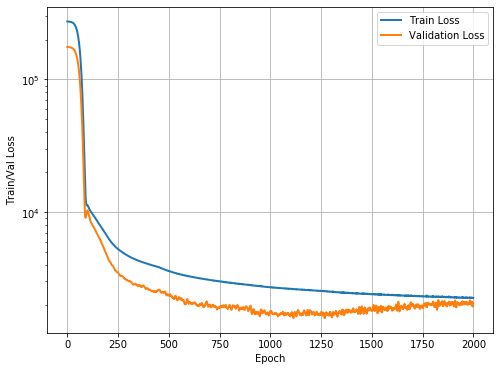

In [8]:
## TODO
# plot the train and validation losses on the same picture
# make sure to label the axis and create a legend 
plt.figure(figsize=(8,6))
plt.semilogy(np.arange(n_epochs), history.history['loss'], label='Train Loss', linewidth=2)
plt.semilogy(np.arange(n_epochs), history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Train/Val Loss')
plt.grid()
plt.legend()

#### Load the testing dataset

In [9]:
X_test = pd.read_csv('https://github.com/asarmadi/tandon_summer2021_ml/raw/main/day05/fish_market_test_feature.csv').values
y_test = pd.read_csv('https://github.com/asarmadi/tandon_summer2021_ml/raw/main/day05/fish_market_test_label.csv').values

In [10]:
# scale the test data using the scaler above
Xtest_s = scaler.transform(X_test)

In [11]:
## TODO
# predict the corresponding y_hat value of the test dataset (use the scaled test data)
y_hat = model.predict(Xtest_s)

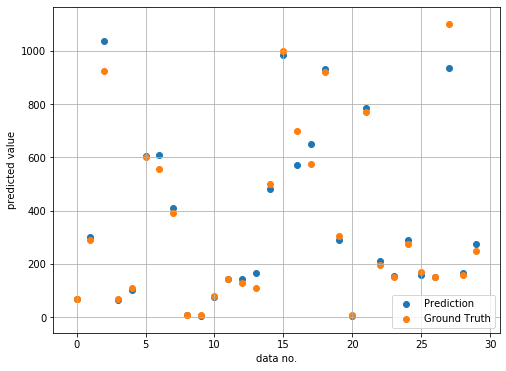

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(np.arange(y_hat.shape[0]), y_hat, label='Prediction')
plt.scatter(np.arange(y_test.shape[0]), y_test, label='Ground Truth')
plt.legend()
plt.xlabel('data no.')
plt.ylabel('predicted value')
plt.grid()

In [13]:
## TODO
# print MSE, RMSE (root-mse), MAE on the train and test data
# compare these results against last week's results (when we used linear/polynimial regression)
y_hat_train = model.predict(X_train)
mse_train = np.mean((y_train - y_hat_train)**2)
rmse_train = np.sqrt(mse_train)
mae_train = np.mean(np.abs(y_train - y_hat_train))

mse_test = np.mean((y_test - y_hat)**2)
rmse_test = np.sqrt(mse_test)
mae_test = np.mean(np.abs(y_test - y_hat))

In [14]:
print(f"The Train MSE is: {mse_train}")
print(f"The Train Root MSE is: {rmse_train}")
print(f"The Train MAE is: {mae_train}")
print('----------')
print(f"The Test MSE is: {mse_test}")
print(f"The Test Root MSE is: {rmse_test}")
print(f"The Test MAE is: {mae_test}")

The Train MSE is: 2247.573832494278
The Train Root MSE is: 47.408583953692165
The Train MAE is: 27.689923800219287
----------
The Test MSE is: 2344.9173331810825
The Test Root MSE is: 48.42434649203934
The Test MAE is: 27.255058625539146
